In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np
from utils import plot_2d, plot_classifier_boundary, test_model
from sklearn.model_selection import GridSearchCV

# LINEAR performing better

In [107]:
def G_SVC_lin():

 
    X, y = datasets.make_blobs(
        n_samples=[500, 500], 
        centers=[(3,5),(8,5)],             
        n_features=1736, 
        cluster_std=[1, 1],
        random_state=42, 
        shuffle=False)


    return X, y

In [108]:
X_lin, y_lin = G_SVC_lin()
X_train, X_test, y_train, y_test = train_test_split(X_lin, y_lin, test_size=.33, random_state=42)

In [109]:
# parameter tuning for linear kernel


param_grid_lin = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['linear']}


grid_lin = GridSearchCV(SVC(), param_grid_lin)
grid_lin.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['linear']})

In [110]:
# parameter tuning for rbf kernel

param_grid_rbf = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7,
                                   10],
                         'kernel': ['rbf']})

In [119]:
model_linear = SVC(kernel='linear',
                   C=grid_lin.best_params_['C'],
                   random_state=42)

model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

In [120]:

print(model_linear.fit(X_train, y_train).score(X_test, y_test) * 100)
print(model_rbf.fit(X_train, y_train).score(X_test, y_test) * 100)

98.48484848484848
98.48484848484848


AUC score: 0.992


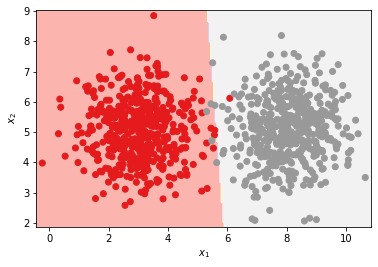

In [121]:
test_model(model_linear, X_lin, y_lin)

AUC score: 0.994


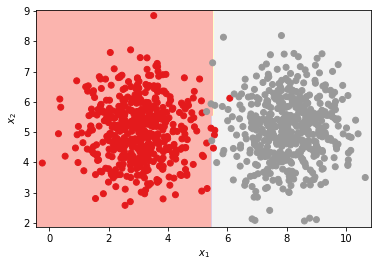

In [122]:
test_model(model_rbf, X_lin, y_lin)

# RBF performing better

In [11]:
def G_SVC_RBF():
    
    X, y = datasets.make_circles(n_samples=1000,
                                 noise=0.2,
                                 factor=0.2,
                                 random_state=42)
    
    return X, y

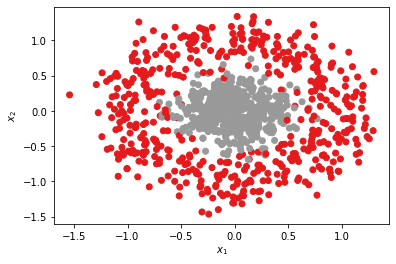

In [12]:
X_rbf, y_rbf = G_SVC_RBF()
X_train, X_test, y_train, y_test = train_test_split(X_rbf,
                                                    y_rbf,
                                                    test_size=.33,
                                                    random_state=42)

plot_2d(X_rbf, y_rbf)

In [13]:
#parameter tuning for linear kernel

param_grid_lin = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['linear']}


grid_lin = GridSearchCV(SVC(), param_grid_lin)
grid_lin.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'kernel': ['linear']})

In [14]:
#parameter tuning for rbf kernel

param_grid_rbf = {'C': [0.001,0.01,0.1,1.,5,10,15,20,30, 40, 50, 60,70,80,90,100],
                  'kernel': ['rbf'],
                  'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7, 10]}


grid_rbf = GridSearchCV(SVC(), param_grid_rbf)
grid_rbf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 5, 10, 15, 20, 30, 40, 50,
                               60, 70, 80, 90, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 0.5, 1, 3, 5, 7,
                                   10],
                         'kernel': ['rbf']})

In [15]:
model_linear = SVC(kernel='linear',
                   C=grid_lin.best_params_['C'],
                   random_state=42)

model_rbf = SVC(kernel='rbf',
                C=grid_rbf.best_params_['C'],
                gamma=grid_rbf.best_params_['gamma'],
                random_state=42)

AUC score: 0.557


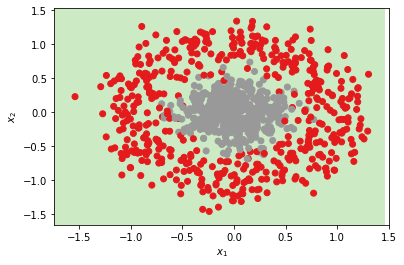

In [16]:
test_model(model_linear, X_rbf, y_rbf)

AUC score: 0.966


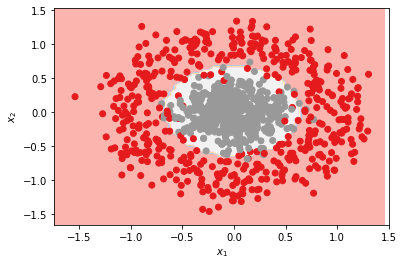

In [17]:
test_model(model_rbf, X_rbf, y_rbf)